In [9]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# Set the paths for your dataset
train_dir = './../Datasets/train'
test_dir = './../Datasets/test'

In [11]:
# Define image dimensions and other parameters
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)
epochs = 5
batch_size = 32

In [12]:
# Create a CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# Data augmentation for training
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')


Found 3663 images belonging to 2 classes.
Found 2085 images belonging to 2 classes.


In [15]:
# Train the model
history=model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=epochs, validation_data=test_generator, validation_steps=test_generator.samples // batch_size)

Epoch 1/5
114/114 [==============================] - 117s 1s/step - loss: 0.5149 - accuracy: 0.7389 - val_loss: 0.2651 - val_accuracy: 0.8760
Epoch 2/5
114/114 [==============================] - 111s 973ms/step - loss: 0.1908 - accuracy: 0.9262 - val_loss: 0.1495 - val_accuracy: 0.9303
Epoch 3/5
114/114 [==============================] - 119s 1s/step - loss: 0.1013 - accuracy: 0.9625 - val_loss: 0.0950 - val_accuracy: 0.9702
Epoch 4/5
114/114 [==============================] - 108s 946ms/step - loss: 0.0579 - accuracy: 0.9796 - val_loss: 0.1952 - val_accuracy: 0.9543
Epoch 5/5
114/114 [==============================] - 113s 993ms/step - loss: 0.0623 - accuracy: 0.9793 - val_loss: 0.1192 - val_accuracy: 0.9534


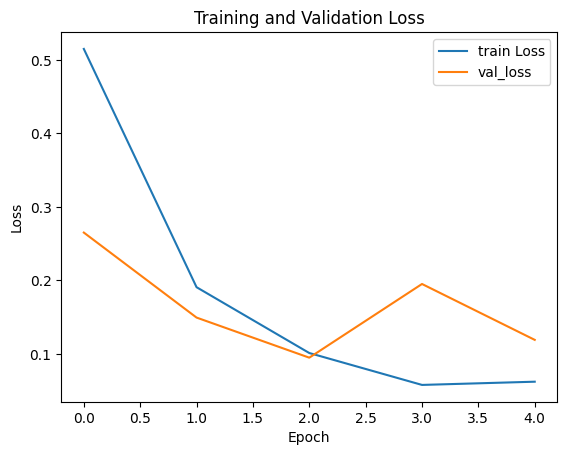

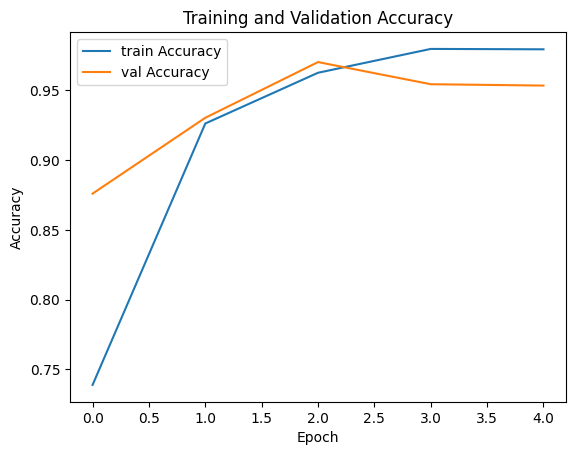

In [17]:
import matplotlib.pyplot as plt

# ... Your model training code here ...

# Plot and save the loss plot
plt.plot(history.history['loss'], label='train Loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('./../Images/loss_plot_model1.png')
plt.show()

# Plot and save the accuracy plot
plt.plot(history.history['accuracy'], label='train Accuracy')
plt.plot(history.history['val_accuracy'], label='val Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('./../Images/accuracy_plot_model1.png')
plt.show()

In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Function to preprocess an image before feeding it to the model
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale pixel values to [0, 1]
    return img_array

# Function to make predictions
def predict_image(model, img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Rick"
    else:
        return "Morty"

# Example usage
new_image_path = './../Datasets/test/Rick/1_E10_890181.jpg'  # Replace with the path to your new image
prediction_result = predict_image(model, new_image_path)
print(f"The model predicts: {prediction_result}")

1/1 [==============================] - 0s 323ms/step
The model predicts: Rick
